# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','phi0']
filenames1 = ['bbbar_new00','phi_new00','ccbar_new00']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 1#25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    #data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 0.4) & (data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[idata['sdphi2'] == -10, 'IsTrue3'] = 1
    data.loc[idata['sdphi3'] == -10, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[idata['IsTrue0'] > 0, 'IsTrue0'] = 1

    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore'] = data['Ecore']*data['The0']
    data['Ecore1'] = data['Ecore']-data['reconpt']
    data['Ecore2'] = data['Ecore1']/data['Ecore']
    data['reconpt1'] = data['Pt']-data['reconpt']
    data['reconpt2'] = data['reconpt1']/data['Pt']
    #data['Alpha'] = data['Alpha']*data['Pt']
    data['reconphi0'] = (data['reconphi0'] - data['Phi0'])*data['Charge']
    data['sdphi2'] = data['sdphi2'] + 10
    data['sdphi3'] = data['sdphi3'] + 10
    data.loc[data['sdphi2'] > 0, 'sdphi2'] = 1
    data.loc[data['sdphi3'] > 0, 'sdphi3'] = 1
    data['sdphi3'] = data['sdphi3']*data['sdphi2']

In [4]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
0        1  0.835107  0.809616  1.004550  0.564941  20.725420  0.122131   
1        1  0.403897  3.194386  1.044351  2.669922  65.315796  0.269043   
3        1  1.236941  2.127112  1.002652  2.291016  16.038572 -0.083069   
4        3  0.692949  2.991292  1.046529  2.677734  67.000252  0.161743   
5        3  0.429597  3.733718  1.001578  3.253906  11.920543  0.238281   

      Ecore  Centrality  Charge  ...  SecondHitTheR3  SecondHitTheL3  \
0  0.876114           3      -1  ...      -99.000000        1.505101   
1  0.387149          55      -1  ...      -99.000000      -99.000000   
3  1.190333           9       1  ...        6.218014      -99.000000   
4  0.718191          41      -1  ...       10.732198      -99.000000   
5  0.397743          73      -1  ...      -99.000000      -99.000000   

   SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  SecondHitTheL31  \
0       -99.000000         0.699666        -99.00000        15.395395   
1       -99.000000       -99.000000        -99.00000       -99.000000   
3       -16.168034       -99.000000          2.49828       -99.000000   
4       -99.000000       -99.000000        -99.00000       -99.000000   
5       -99.000000       -99.000000        -99.00000       -99.000000   

      Ecore1     Ecore2   reconpt1   reconpt2  
0 -59.678489 -68.117246 -59.719498 -71.511230  
1   0.031203   0.080596   0.047950   0.118719  
3  -0.123381  -0.103652  -0.076772  -0.062066  
4  -0.457696  -0.637289  -0.482938  -0.696932  
5  -0.036049  -0.090633  -0.004194  -0.009764  

[5 rows x 68 columns]

In [5]:
print(data.size, data.shape)

774781732 (11393849, 68)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi0','sdphi1','sdphi2','sdthe0','sdthe1','sdthe2','sdthe3','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns=  ['SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01'])
data = data.drop(columns=  ['SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11'])
data = data.drop(columns=  ['SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21'])
data = data.drop(columns=  ['SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31'])
data = data.drop(columns=  ['Alpha','Charge', 'Arm'])

In [7]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'Alpha', 'Ecore','sdphi0','sdphi1','sdphi2','sdphi3','SecondHitPhiR0','SecondHitPhiR1','SecondHitTheR2','SecondHitPhiR3' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


In [8]:
#analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [9]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [10]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

3797949 7595900


In [11]:
X_test

NBDThit        Pt     Ecore  Centrality   reconpt  reconphi0  sdphi3  \
461808         3  0.936859  0.971347          66  0.516819  -0.023524     0.0   
461811         1  0.451461  0.521926          35  0.504049   0.002386     0.0   
461812         3  1.159480  1.236688          24  1.435810   0.001006     0.0   
461813         3  1.159480  1.236688          24  1.435810   0.001006     1.0   
461814         3  0.667121  0.668755          50  0.445738  -0.005313     0.0   
...          ...       ...       ...         ...       ...        ...     ...   
6907179        2  0.662880  0.576193          22  0.559899   0.003599     0.0   
6907186        3  0.452813  0.419044          49  0.648010   0.028746     0.0   
6907187        3  0.452813  0.419044          49  0.648010   0.028746     1.0   
6907188        3  0.594463  0.593136          36  0.655892   0.006284     0.0   
6907189        3  0.594463  0.593136          36  0.655892   0.006284     1.0   

           Ecore1    Ecore2  reconpt1  reconpt2  
461808   0.454528  0.467936  0.420040  0.448349  
461811   0.017877  0.034252 -0.052588 -0.116484  
461812  -0.199122 -0.161012 -0.276330 -0.238323  
461813  -0.199122 -0.161012 -0.276330 -0.238323  
461814   0.223017  0.333481  0.221384  0.331849  
...           ...       ...       ...       ...  
6907179  0.016294  0.028279  0.102981  0.155354  
6907186 -0.228966 -0.546401 -0.195197 -0.431076  
6907187 -0.228966 -0.546401 -0.195197 -0.431076  
6907188 -0.062756 -0.105803 -0.061429 -0.103336  
6907189 -0.062756 -0.105803 -0.061429 -0.103336  

[3797949 rows x 11 columns]

In [12]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [13]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yoren/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     86026
           1       0.98      1.00      0.99   3711923

    accuracy                           0.98   3797949
   macro avg       0.49      0.50      0.49   3797949
weighted avg       0.96      0.98      0.97   3797949

confusion matrix
[[      0   86026]
 [      0 3711923]]


In [14]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[24],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[24]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.97730459255772
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 24}
0.9896062322058564
time of execution (sec) 1212.0273144245148


# Cross Validation

In [15]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.07      0.00      0.00     86026
           1       0.98      1.00      0.99   3711923

    accuracy                           0.98   3797949
   macro avg       0.52      0.50      0.49   3797949
weighted avg       0.96      0.98      0.97   3797949



In [16]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.16819984183591266
roc auc: 0.8157833567679881
f1 score: 0.9297345625925904


Text(0.5, 1.0, 'ROC AUC Curve')

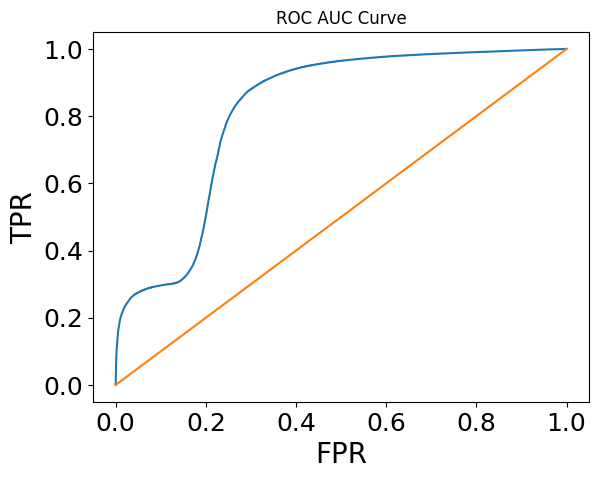

In [17]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [18]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.10818299991483316


In [58]:
i = 600000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.975 0.5954
0.9564824100510788 0.5806267872503662 0.9751710905641092


In [59]:
print(sum(predicted),len(predicted))

3797753 3797949


In [60]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.9539098645272825


In [61]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [62]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
centrality_prev, pt_prev, IsTrue0_prev = 0, 0, 0
centrality, pt, IsTrue0 = 0, 0, 0
prob, prob_prev = 0, 0
isTrue_sd, isTrue_sd_prev = 0, 0
for index, row in data0.iterrows():
    counter+=1
    if counter>400000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centralityloc, ptloc, IsTrue0loc = row['Centrality'], row['Pt'], row['IsTrue0']

    if ptloc<0.4 or centralityloc<0: continue

    if abs(ptloc -  pt_prev) < 1e-6: 
        cont = 0
        if proba_loc[counter][1] > prob_prev:
            prob_prev = proba_loc[counter][1]
            IsTrue0_prev = IsTrue0loc
        #isTrue_sd_prev = IsTrue0loc
    else: 
        isTrue_sd = isTrue_sd_prev
        isTrue_sd_prev = IsTrue0loc
        pt = pt_prev
        pt_prev = ptloc
        centrality = centrality_prev
        centrality_prev = centralityloc
        prob = prob_prev
        prob_prev = proba_loc[counter][1]
        IsTrue0 = IsTrue0_prev
        IsTrue0_prev = IsTrue0loc
        cont = 1

    if not cont: continue

    if True: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if isTrue_sd: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if prob>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [63]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

263892.1 4642.1 0.994 1.651 0.984 0.913 0.928 0.595


In [64]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

1.789 0.99 0.553 32


In [65]:
%run input/Format.ipynb
#%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


0.0 1586.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file output/kek.png has been created


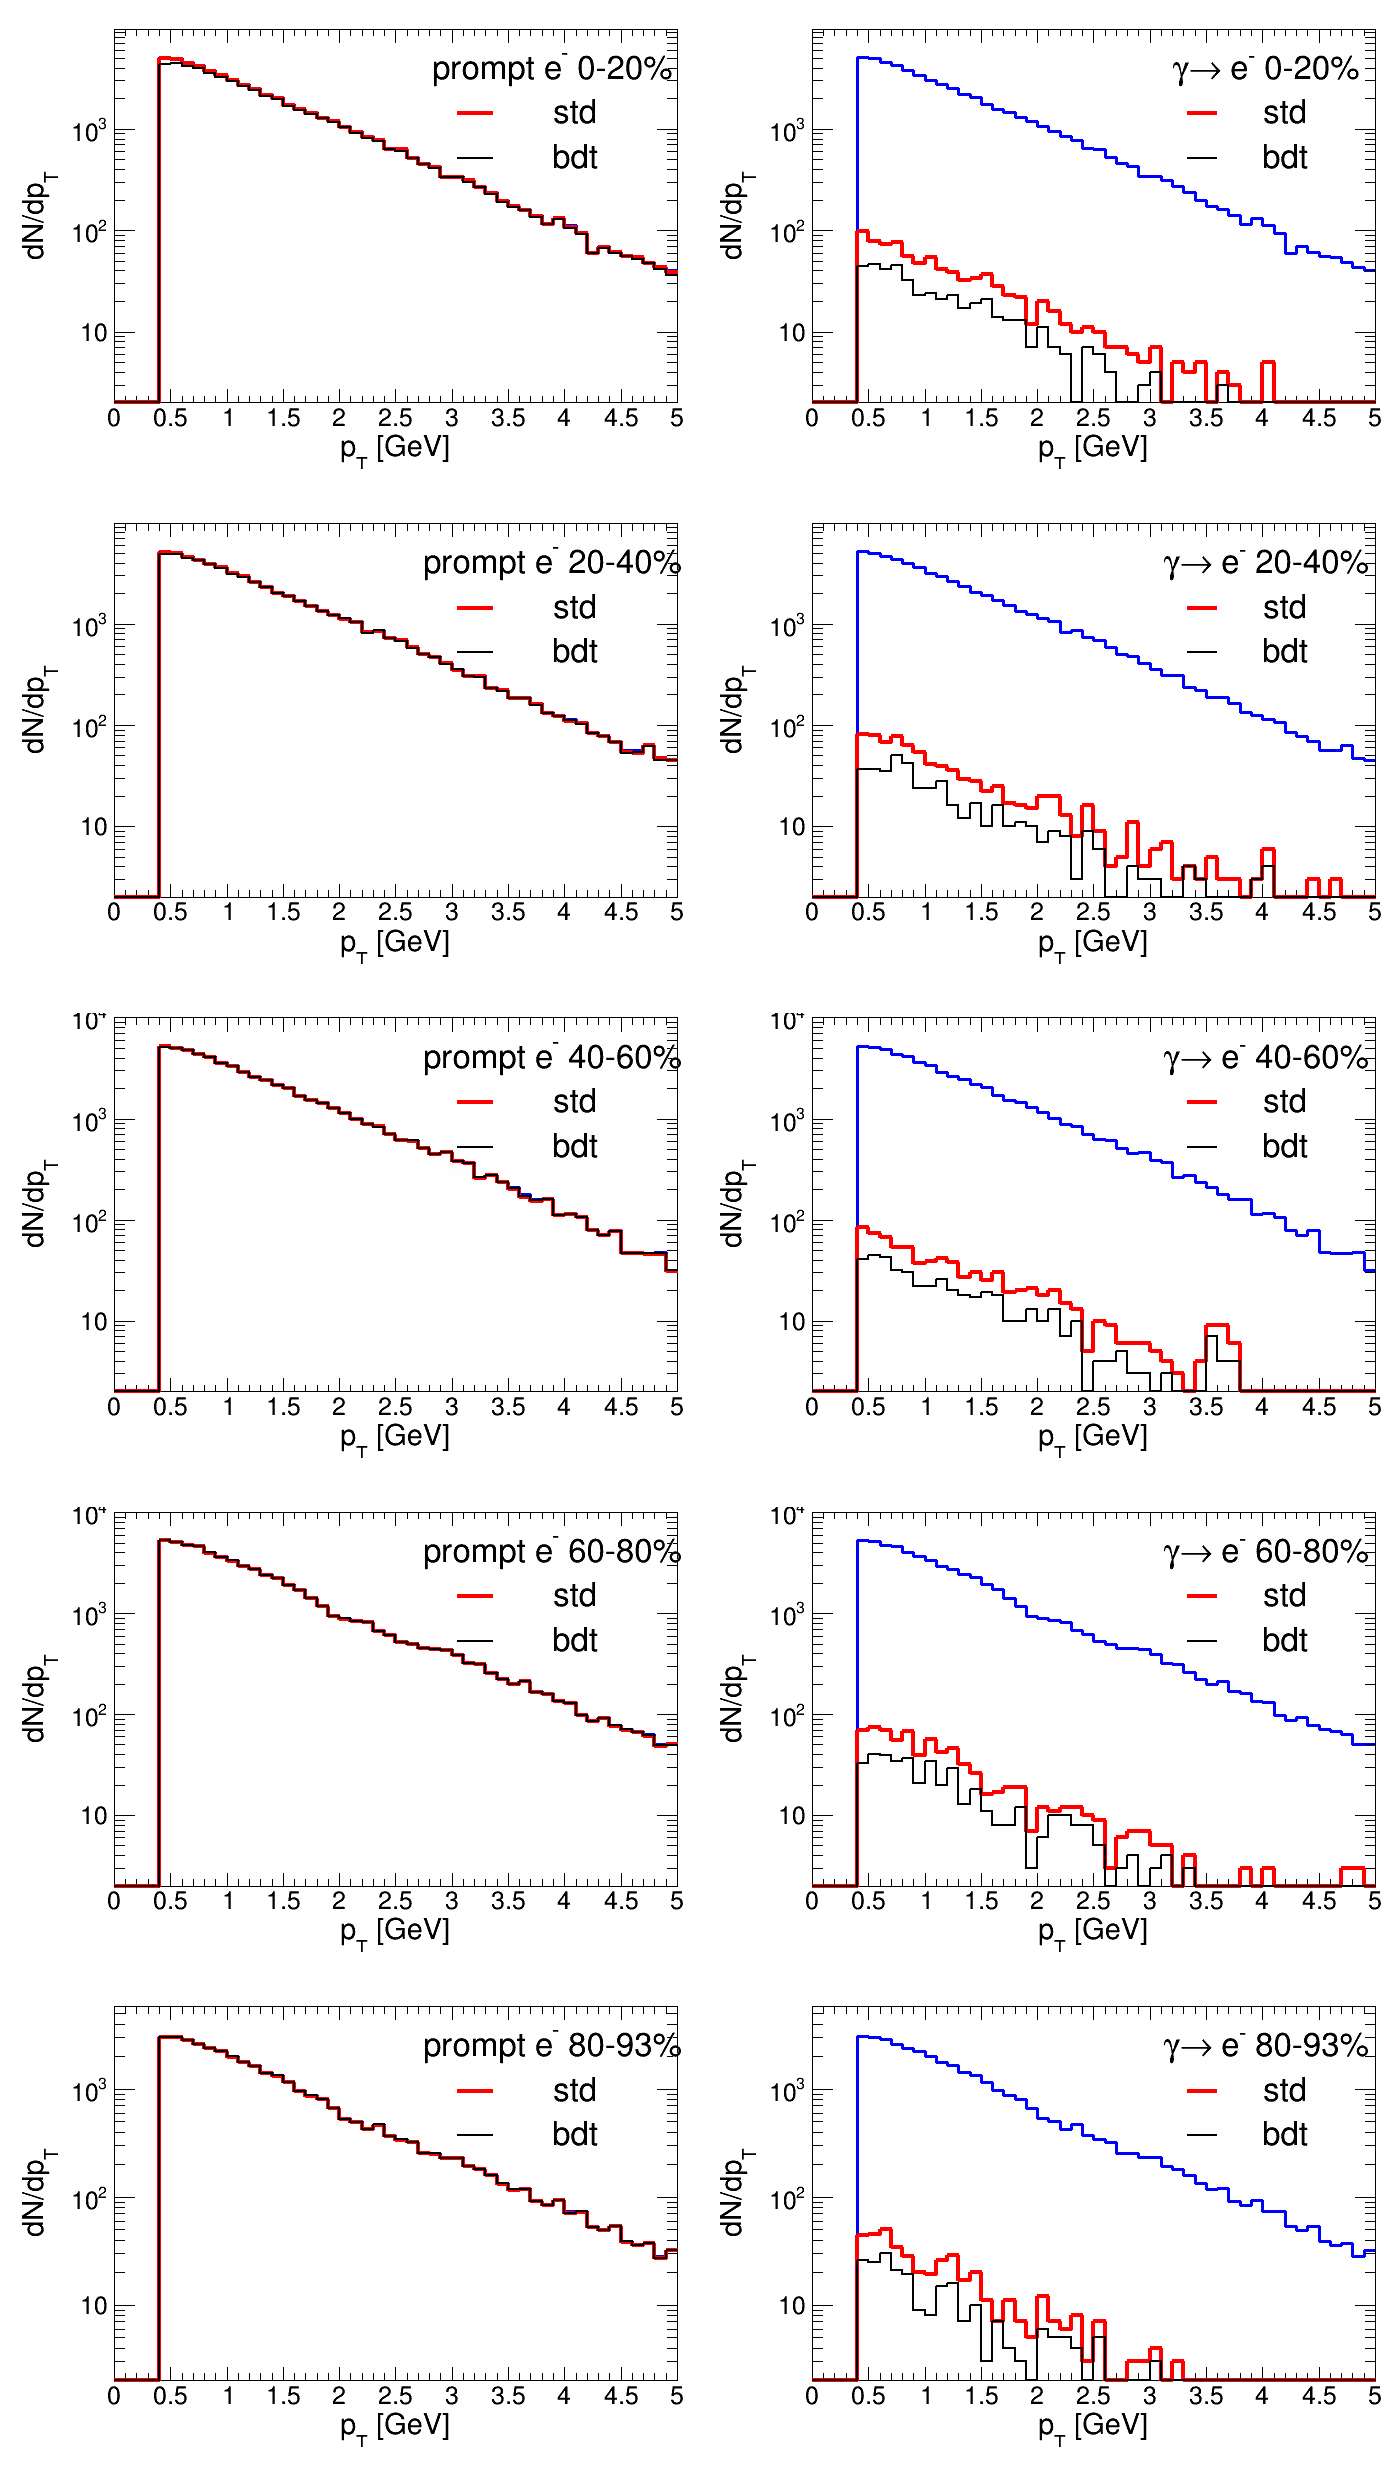

In [66]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(8)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(4)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(2)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(8)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(4)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(2)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))
c1.SaveAs("output/kek.png")

In [67]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [68]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [69]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


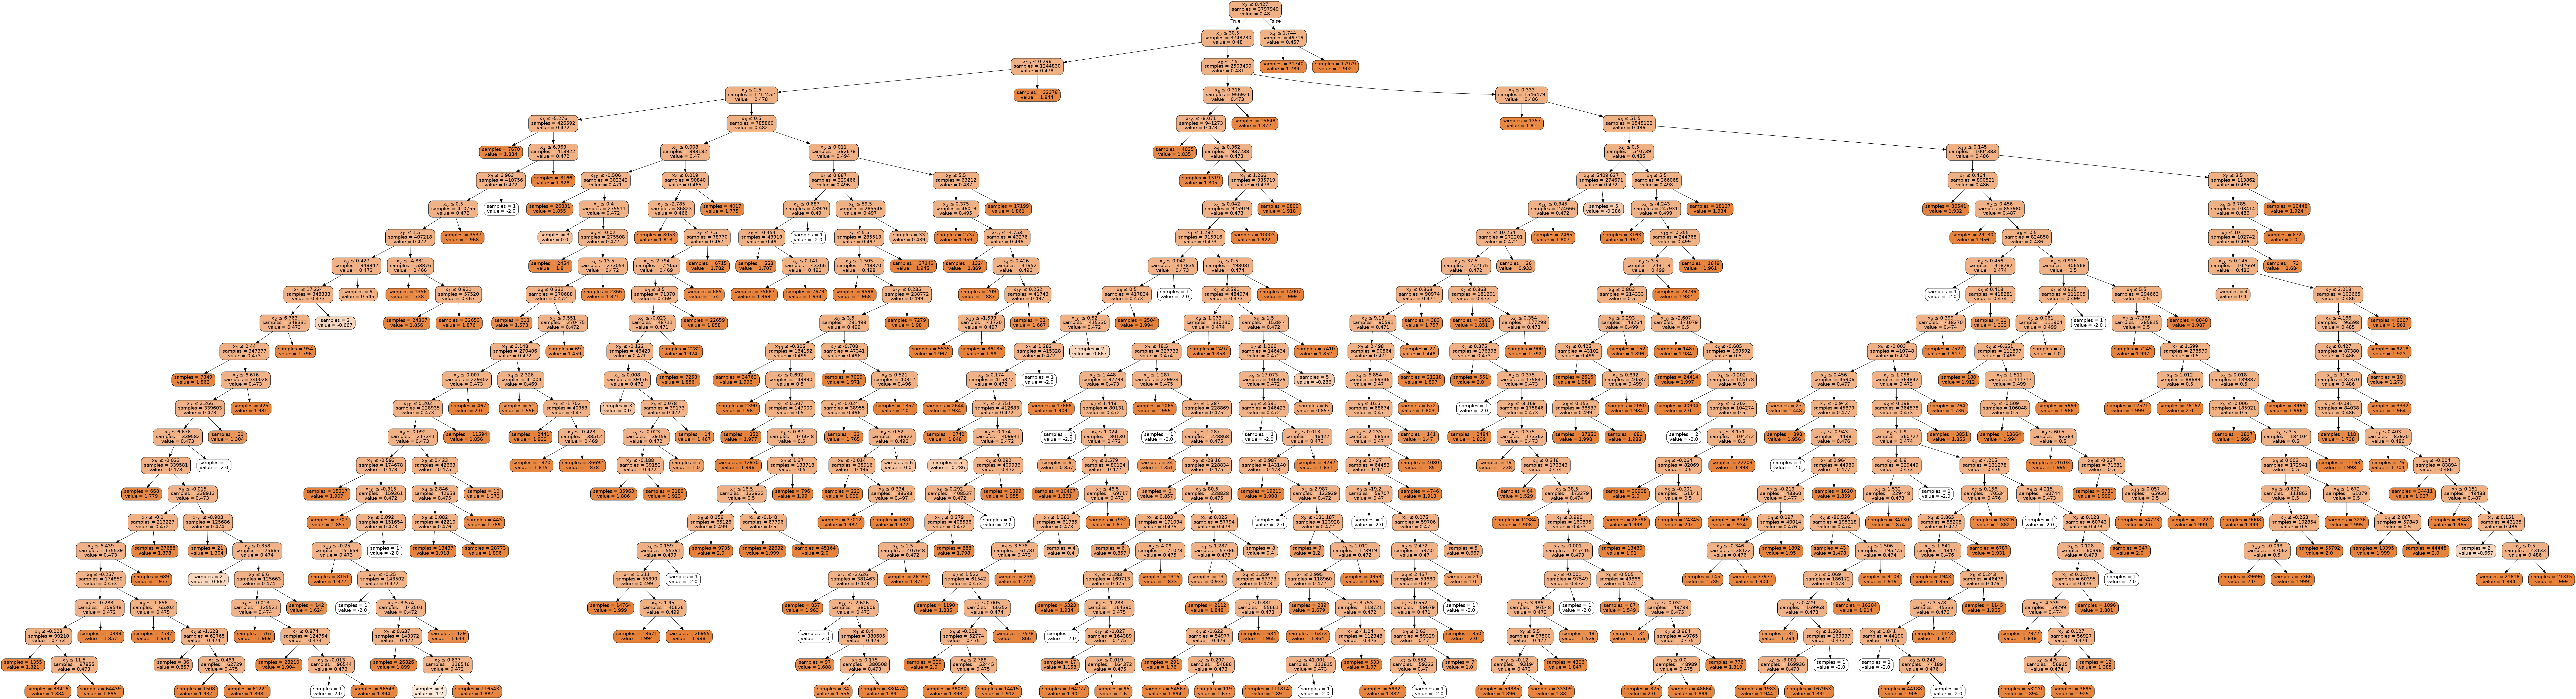

In [70]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [71]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [72]:
clf2.predict_proba(kek_data[0:100])

array([[0.04609014, 0.95390986],
       [0.02819839, 0.97180161],
       [0.0300988 , 0.9699012 ],
       [0.03004401, 0.96995599],
       [0.03137129, 0.96862871],
       [0.00443947, 0.99556053],
       [0.04185963, 0.95814037],
       [0.03186042, 0.96813958],
       [0.00426566, 0.99573434],
       [0.02947924, 0.97052076],
       [0.02904608, 0.97095392],
       [0.00413255, 0.99586745],
       [0.02901216, 0.97098784],
       [0.02892849, 0.97107151],
       [0.00421049, 0.99578951],
       [0.03018689, 0.96981311],
       [0.01178433, 0.98821567],
       [0.03018689, 0.96981311],
       [0.03311422, 0.96688578],
       [0.03311422, 0.96688578],
       [0.03054359, 0.96945641],
       [0.00824331, 0.99175669],
       [0.00824331, 0.99175669],
       [0.02861747, 0.97138253],
       [0.00459359, 0.99540641],
       [0.03033956, 0.96966044],
       [0.00427869, 0.99572131],
       [0.02965673, 0.97034327],
       [0.00416068, 0.99583932],
       [0.02930129, 0.97069871],
       [0.

In [73]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 24}


In [74]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.02947924, 0.97052076],
       [0.02904608, 0.97095392],
       [0.00413255, 0.99586745],
       [0.02901216, 0.97098784],
       [0.02892849, 0.97107151],
       [0.00421049, 0.99578951],
       [0.03018689, 0.96981311],
       [0.01178433, 0.98821567],
       [0.03018689, 0.96981311],
       [0.03311422, 0.96688578],
       [0.03311422, 0.96688578]])

In [75]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,1):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[0.37819413 0.37872648 0.39984989 0.38232711 0.38672199 0.39987222
 0.37985866 0.39365877 0.37985866 0.37118825]
[3.72527874 3.79183495 4.25734758 3.72527874 3.81779566 4.16333239
 3.77047027 4.1254406  3.77047027 3.73067586 3.73067586]
[0.59343748 0.59356591 0.59865159 0.59443425 0.59549334 0.59865696
 0.59383901 0.59716316 0.59383901 0.59174607]


In [76]:
best_gbc = clf2.best_estimator_

In [77]:
n_estim = best_gbc.n_estimators

In [78]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[3.49414638 3.50939554 5.48471978 3.510599   3.5135731  5.46595792
 3.46969559 4.42913006 3.46969559 3.37411769]
[0.97052076 0.97095392 0.99586745 0.97098784 0.97107151 0.99578951
 0.96981311 0.98821567 0.96981311 0.96688578]
0.2


In [79]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [80]:
print(log_odds_predictions)

[[1.8909706505310695, 1.893632416787265, 1.999249425341277, 1.911635565312843, 1.933609958506224, 1.999361124421019, 1.8992932862190812, 1.9682938401853247, 1.8992932862190812, 1.8559412391896695], [1.5728829342716466, 1.5728829342716466, 1.6724530933621533, 1.5728829342716466, 1.5956770452006124, 1.6702566354977242, 1.5547597126208368, 1.6555715760540757, 1.5547597126208368, 1.5527125995586144], [1.37852861573214, 1.3805030081353145, 1.4824039498563255, 1.37852861573214, 1.3805030081353145, 1.4798704028807825, 1.4077829782032565, 1.457934548717901, 1.4077829782032565, 1.3433161773189002], [1.22816176896141, 1.2469972382563235, 1.3577783234902683, 1.2453136344903104, 1.3086748012003064, 1.3560163641313439, 1.192119357105415, 1.3343317347649821, 1.192119357105415, 1.232705777885053], [1.1436642326739612, 1.1436642326739612, 1.272311938765606, 1.1385096833460784, 1.1504392717350547, 1.2723619569483084, 1.094946641119761, 1.214887941517317, 1.094946641119761, 1.1344839318386548], [1.06252

In [81]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(n_estim)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 3.494146378241453
[3.49414638 3.50939554 5.48471978 3.510599   3.5135731  5.46595792
 3.46969559 4.42913006 3.46969559 3.37411769]


In [82]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

24
1
[[1.8909706505310695, 1.5728829342716466, 1.37852861573214, 1.22816176896141, 1.1436642326739612, 1.0625296067021732, 0.9879629434886706, 0.9259645960473945, 0.8889738501014804, 0.8124292512457213, 0.7495525925134544, 0.6902836959340405, 0.628074789742762, 0.5815336997575202, 0.5097004280528948, 0.45089632632434307, 0.3924423097203616, 0.3685050288812321, 0.2880635114293481, 0.2538371427818953, 0.21528954087054583, 0.18044759112145417, 0.14606418110410646, 0.1239726032176414], [1.893632416787265, 1.5728829342716466, 1.3805030081353145, 1.2469972382563235, 1.1436642326739612, 1.0625296067021732, 0.9879629434886706, 0.9310526444972971, 0.8663444851207105, 0.8124292512457213, 0.7495525925134544, 0.6902836959340405, 0.628074789742762, 0.6179935774858842, 0.5097004280528948, 0.45089632632434307, 0.4347589489764814, 0.35616957932842824, 0.2880635114293481, 0.2538371427818953, 0.2140576476846189, 0.18044759112145417, 0.14606418110410646, 0.12907892910551716], [1.999249425341277, 1.672453

In [83]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [84]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [85]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Ecore', 'Centrality', 'reconpt', 'reconphi0', 'sdphi3', 'Ecore1', 'Ecore2', 'reconpt1', 'reconpt2']
11


In [86]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[8] <= 0.42749443650245667) if (x[3] > 30.5) if (x[0] <= 2.5) if (x[8] <= 0.3161904215812683) if (x[10] > -8.071453094482422) if (x[4] > 0.36177924275398254) if (x[7] <= 1.266183078289032) if (x[5] <= 0.04154515266418457) if (x[1] <= 1.2819923162460327) if (x[5] <= 0.04153800010681152) if (x[6] <= 0.5) if (x[10] <= 0.5199305415153503) if (x[1] <= 1.2819873690605164) if (x[2] > 0.17398816347122192) if (x[7] > -2.751216173171997) if (x[2] > 0.17405769228935242) if (x[8] <= 0.2921033203601837) if (x[8] <= 0.2920994907617569) if (x[10] <= 0.27901722490787506) if (x[0] <= 1.5) if (x[10] > -2.625723123550415) if (x[10] > -2.6256303787231445) if (x[1] > 0.40022842586040497) if (x[2] > 0.17517587542533875)   return 1.8909706505310697;  // | based on 380,474 samples
        if  (x[8] <= 0.42749443650245667) if (x[3] > 30.5) if (x[0] > 2.5) if (x[4] > 0.333343043923378) if (x[3] > 51.5) if (x[10] <= 0.14534558355808258) if (x[1] > 0.46371735632419586) i

In [87]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [88]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[8] <= 0.42749443650245667) and (x[3] > 30.5) and (x[0] <= 2.5) and (x[8] <= 0.3161904215812683) and (x[10] > -8.071453094482422) and (x[4] > 0.36177924275398254) and (x[7] <= 1.266183078289032) and (x[5] <= 0.04154515266418457) and (x[1] <= 1.2819923162460327) and (x[5] <= 0.04153800010681152) and (x[6] <= 0.5) and (x[10] <= 0.5199305415153503) and (x[1] <= 1.2819873690605164) and (x[2] > 0.17398816347122192) and (x[7] > -2.751216173171997) and (x[2] > 0.17405769228935242) and (x[8] <= 0.2921033203601837) and (x[8] <= 0.2920994907617569) and (x[10] <= 0.27901722490787506) and (x[0] <= 1.5) and (x[10] > -2.625723123550415) and (x[10] > -2.6256303787231445) and (x[1] > 0.40022842586040497) and (x[2] > 0.17517587542533875) :  return 1.8909706505310697  # | based on 380,474 samples
        if (x[8] <= 0.42749443650245667) and (x[3] > 30.5) and (x[0] > 2.5) and (x[4] > 0.333343043923378) and (x[3] > 51.5) and (x[10] <= 0.145345583

In [89]:
def mytree(x,y):
    return 0

In [90]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [91]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [92]:
iestim = 0
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(n_estim)]
print(myf)

[1.89097065 1.89363242 1.99924943 1.91163557 1.93360996 1.99936112
 1.89929329 1.96829384 1.89929329 1.85594124]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [93]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.9705207563271487, 0.9709539218064207, 0.9958674510902804, 0.9709878429679698, 0.9710715074209609, 0.9957895144038358, 0.9698131078789729, 0.9882156674185602, 0.9698131078789729, 0.9668857838154916]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [94]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Ecore', 'Centrality', 'reconpt', 'reconphi0', 'sdphi3', 'Ecore1', 'Ecore2', 'reconpt1', 'reconpt2']
11
